In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [35]:
def image_grid(images, rows, cols):
    grid_height = rows * images[0].shape[0]
    grid_width = cols * images[0].shape[1]
    grid = np.zeros((grid_height, grid_width, images[0].shape[2]), dtype=np.uint8)
    for i, image in enumerate(images):
        row = i // cols
        col = i % cols
        grid[row*images[0].shape[0]:(row+1)*images[0].shape[0],
             col*images[0].shape[1]:(col+1)*images[0].shape[1], :] = image
    return grid

In [36]:
image1 = cv2.imread('/home/gpaudel/Documents/DL/Datasets/headset/1.png')
image2 = cv2.imread('/home/gpaudel/Documents/DL/Datasets/headset/2.png')
image3 = cv2.imread('/home/gpaudel/Documents/DL/Datasets/headset/3.png')
image4 = cv2.imread('/home/gpaudel/Documents/DL/Datasets/headset/4.png')

In [37]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(image1)
plt.axis('off')
plt.show()

plt.imshow(image2)
plt.axis('off')
plt.show()

plt.imshow(image3)
plt.axis('off')
plt.show()

plt.imshow(image4)
plt.axis('off')
plt.show()

In [38]:
# placing generated images in a list
images = [image1, image2, image3, image4]
rows = 2
cols = 2
grid = image_grid(images, rows, cols)

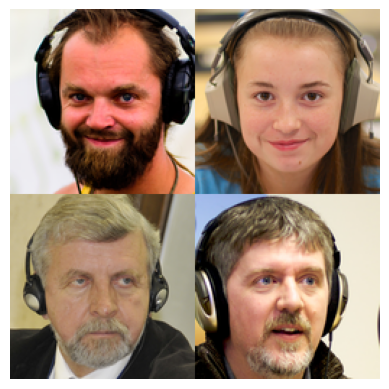

In [39]:
plt.imshow(grid)
plt.axis('off')
plt.show()

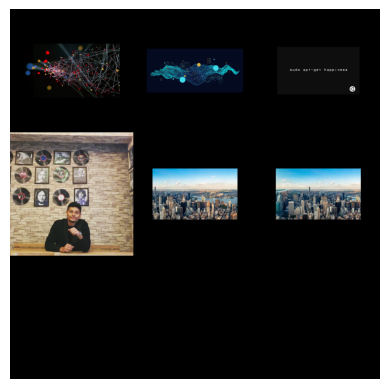

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt


class ImageCollage:
    def __init__(self, image_directory):
        self.image_directory = image_directory
        self.image_files = []
        self.images = []

    def load_images(self):
        self.image_files = [file for file in os.listdir(self.image_directory) if
                            file.endswith((".jpg",".png"))]
        for file in self.image_files:
            file_path = os.path.join(self.image_directory, file)
            image = plt.imread(file_path)
            self.images.append(image)

    def collage(self):
        numof_images = len(self.images)
        grid_size = int(np.ceil(np.sqrt(numof_images)))
        block_size = max(max(image.shape[0] for image in self.images),
                         max(image.shape[1] for image in self.images))

        grid = np.zeros((grid_size * block_size, grid_size * block_size, 3), dtype=np.uint8) * 255

        for i, image in enumerate(self.images):
            row = i // grid_size
            col = i % grid_size
            height, width, _ = image.shape
            start_y = row * block_size + (block_size - height) // 2
            start_x = col * block_size + (block_size - width) // 2
            end_y = start_y + height
            end_x = start_x + width
            grid[start_y:end_y, start_x:end_x, :] = image

        return grid

    def display_collage(self):
        grid = self.collage()

        plt.imshow(grid)
        plt.axis('off')
        plt.show()

image_directory = "/home/gpaudel/Documents/images/"
collage = ImageCollage(image_directory)
collage.load_images()
collage.display_collage()


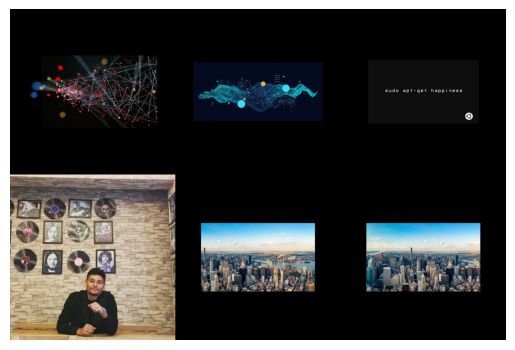

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


class ImageCollage:
    def __init__(self, directory_path):
        self.directory_path = directory_path
        self.image_files = []
        self.images = []

    def load_images(self):
        self.image_files = [file for file in os.listdir(self.directory_path) if file.endswith((".jpg", ".png"))]

        for file in self.image_files:
            file_path = os.path.join(self.directory_path, file)
            image = Image.open(file_path)
            self.images.append(image)

    def create_collage(self):
        num_images = len(self.images)
        images_per_row = int(np.ceil(np.sqrt(num_images)))
        images_per_column = int(np.ceil(num_images / images_per_row))

        max_width = max(image.width for image in self.images)
        max_height = max(image.height for image in self.images)

        grid = np.zeros((images_per_column * max_height, images_per_row * max_width, 3), dtype=np.uint8)

        for i, image in enumerate(self.images):
            row_index = i // images_per_row
            col_index = i % images_per_row

            x_start = col_index * max_width
            y_start = row_index * max_height

            image_array = np.array(image)
            image_array = self.center_image(image_array, max_width, max_height)

            grid[y_start:y_start + image_array.shape[0], x_start:x_start + image_array.shape[1]] = image_array

        return grid

    def center_image(self, image, max_width, max_height):
        height, width, _ = image.shape

        offset_x = (max_width - width) // 2 
        offset_y = (max_height - height) // 2

        new_image = np.zeros((max_height, max_width, 3), dtype=np.uint8)
        new_image[offset_y:offset_y+height, offset_x:offset_x+width] = image
        
        return new_image

    def display_collage(self):
        grid = self.create_collage()

        plt.imshow(grid)
        plt.axis('off')
        plt.show()


directory_path = "/home/gpaudel/Documents/images/"
collage = ImageCollage(directory_path)
collage.load_images()
collage.display_collage()